In [1]:
import pandas as pd

# Transantiago's travels public submit
url = 'https://github.com/diegocaro/tallerds/raw/master/notebooks/origen_destino_stgo_2012/EOD_STGO/viajes.csv'
viajes = pd.read_csv(url, sep=';', decimal=',', index_col=['Viaje'])

In [2]:
# Let's work with a sample to save computing time
data_cols = ['OrigenCoordX', 'OrigenCoordY', 'DestinoCoordX', 'DestinoCoordY']
drop_cols = [x for x in list(viajes.columns) if x not in data_cols]
viajes_sample = viajes.drop(columns=drop_cols).replace(0, None).dropna().drop_duplicates().sample(n=8000)

# Check size
viajes_sample.shape

(8000, 4)

In [3]:
# Remove travels from/to outside the city, so the plot don't have to scale way outside the city

limit_n = 6316000
limit_s = 6278000
limit_w =  332000
limit_e =  368000

query = '@limit_s < OrigenCoordY < @limit_n'
query += ' and @limit_s < DestinoCoordY < @limit_n'
query += ' and @limit_w < OrigenCoordX < @limit_e'
query += ' and @limit_w < DestinoCoordX < @limit_e'

viajes_city = viajes_sample.query(query)

# Check size
viajes_city.shape

(7025, 4)

In [4]:
import ForcedirectedEdgeBundling as feb

edges = feb.array2edges(viajes_city.values)
# Check size (small edges are removed)
len(edges)

6885

In [5]:
# Overwrite default hyper-parameters:
#
# higher initial distance to move points
feb.S_initial = 50
# lowe compatibility threshold
compatibility_threshold = 0.5

%time output_lines = feb.forcebundle(edges)


CPU times: user 16min 28s, sys: 31.3 s, total: 16min 59s
Wall time: 20min 51s


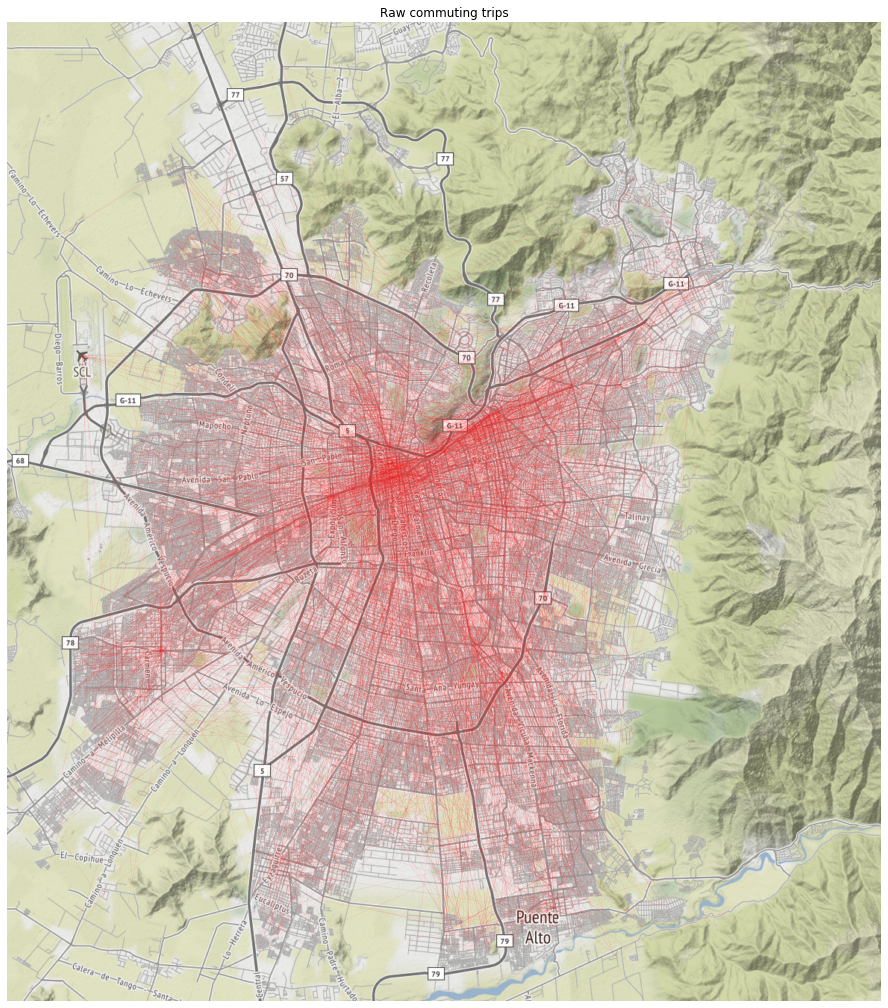

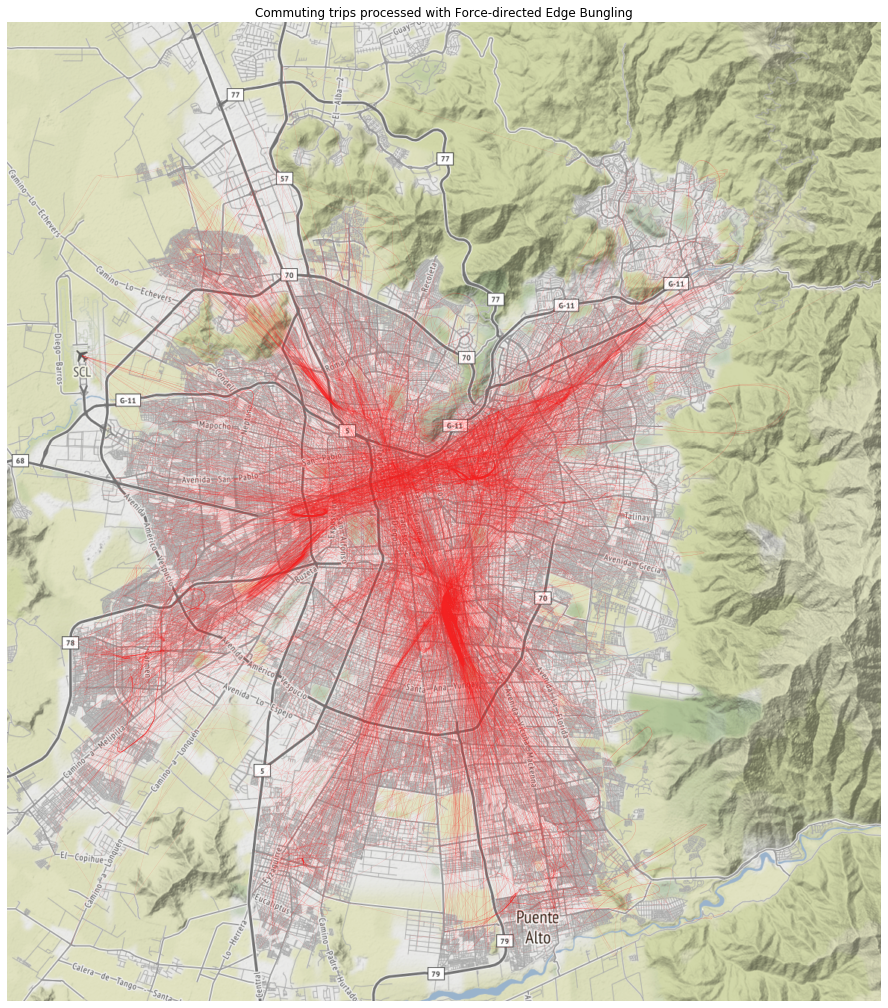

In [6]:
import usageHelper
%matplotlib inline

# Plot raw for comparison
input_lines = feb.edges2lines(edges)
usageHelper.plot_lines_on_map(input_lines, footer='Raw commuting trips')

# Plot trips after Force-directed Edge Bungling
usageHelper.plot_lines_on_map(output_lines, footer='Commuting trips processed with Force-directed Edge Bungling')